## Overview
Thusfar we have been looking at descriptive statistics and relationships between various data sets.  In most applications this involves data of a single variable over time, _i.e._, a time-series.  We will continue looking at time variations but now investigate variability in the frequency domain.  This is usually quite revealing particularly for high-variance data on different time-scales.

The basic idea is to transform data from the temporal domain into the frequency domain.  Related, instead of looking at (for example) peaks at certain times we look at peaks (power) in certain frequencies.  For example, a time-series of temperature might show peaks of high temperatures in the summer and low temperature in the winter.  A time-series plot therefore will resemble a sine curve.  In the frequency space, this would be represented as a peak in the annual period; in other words, the time-series has dominant energy in the annual frequency band.

To do this, we will analyze data use spectra.  In the notebook below we first look at the process in a generic, mathematical sense.  Next, we use a  sound as a representative time-series.  Finally, a specific example is given.

This material was take from my various acoustic notebooks, as well as from https://pysdr.org/content/frequency_domain.html

## Frequency Domain

One of the fundamental ways of performing digital signal processing (DSP) is in the frequency domain. Most people’s experience with working in the frequency domain is limited to adjusting the bass/mid/treble knobs on a car’s audio system. Most people’s experience with viewing something in the frequency domain is limited to seeing an audio equalizer, such as this clip:

<img src='./images/audio_equalizer.webp'>

By the end of this section you should understand what the frequency domain really means, how to convert between time and frequency (plus what happens when we do so), and some interesting principles used in DSP. 

First, why do we like to look at signals in the frequency domain? Well here are two example signals, shown in both the time and frequency domain.

<img src='./images/time_and_freq_domain_example_signals.png' height=75% width=75%>

As you can see, in the time domain they both just kind of look like noise, but in the frequency domain we can see different features. Everything is in the time domain in its natural form; when we sample signals we will be sampling them in the time domain, because you can’t directly sample a signal in the frequency domain. But the interesting stuff usually happens in the frequency domain.

## Fourier Series

The basics of the frequency domain start with understanding that any signal can be represented by sine waves summed together. When we break a signal down into its composite sine waves, we call it a Fourier series. Here is an example of a signal that is made up of only two sine waves:

<img src='./images/summing_sinusoids.svg'>

Here is another example; the red curve in the below approximates a sawtooth wave by summing up to 10 sine waves. We can see that it’s not a perfect reconstruction–it would take an infinite number of sine waves to reproduce this sawtooth wave due to the sharp transitions:

<img src='./images/fourier_series_triangle.gif'>

Some signals require more sine waves than others, and some require an infinite amount, although they can always be approximated with a limited number. Here is another example of a signal being broken down into a series of sine waves:

<img src='./images/fourier_series_arbitrary_function.gif'>

To understand how we can break down a signal into sine waves, or sinusoids, we need to first review the three attributes of a sine wave:

  * Amplitude
  * Frequency
  * Phase

__Amplitude__ indicates the “strength” of the wave, while __frequency__ is the number of waves per second. __Phase__ is used to represent how the sine wave is shifted in time, anywhere from 0 to 360 degrees (or 0 to $2\pi$), but it must be relative to something to have any meaning, such as two signals with the same frequency being 30 degrees out of phase with each other.

<img src='./images/amplitude_phase_period.svg'>

At this point you may have realized that a “signal” is essentially just a function, usually represented “over time” (_i.e._, the x-axis). Another attribute that is easy to remember is period, which is the inverse of frequency. The period of a sinusoid is the amount of time, in seconds, for the wave to finish one cycle. Thus, the unit of frequency is 1/seconds, or Hz.

When we decompose a signal into a summation of sine waves, each one will have a certain amplitude, phase, and frequency. Each sine wave’s amplitude will tell us how strong the frequency existed in the original signal. Don’t worry too much about phase for now, other than realizing that the only difference between sin() and cos() is a phase shift (time shift).

It’s more important to understand the underlying concept than the actual equations to solve for a Fourier series, but for those who are interested in the equations I refer you to Wolfram’s concise explanation: https://mathworld.wolfram.com/FourierSeries.html.

## Time-Frequency Pairs

We have established that signals can be represented as sine waves, which have several attributes. Now, let’s learn to plot signals in the frequency domain. While the time domain demonstrates how a signal changes over time, the frequency domain displays how much of a signal rests in which frequencies. Instead of the x-axis being time it will be frequency. We can plot a given signal in both time and frequency. Let’s look at some simple examples to start.

Here is what a sine wave, with frequency f, looks like in the time and frequency domain:

<img src='./images/sine-wave.png'>

The time domain should look very familiar. It’s an oscillating function. Don’t worry about at what point in the cycle it starts or how long it lasts. The take-away is that the signal has a single frequency, which is why we see a single spike/peak in the frequency domain. Whichever frequency that sine wave oscillates at will be where we see the spike in the frequency domain. The mathematical name for a spike like this is called an “impulse”.

Now what if we had an impulse in the time domain? Imagine a sound recording of someone clapping their hands or hitting a nail with a hammer. This time-frequency pair is a little less intuitive.

<img src='./images/impulse.png'>

As we can see, a spike/impulse in the time domain is flat in the frequency domain, and theoretically it contains every frequency. There is no theoretically perfect impulse because it would have to be infinitely short in the time domain. Like the sine wave, it doesn’t matter where in the time domain the impulse happens. The important take-away here is that quick changes in time domain result in many frequencies occurring.

Next let’s look at the time and frequency domain plots of a square wave:

<img src='./images/square-wave.svg'>

This one is also less intuitive, but we can see that the frequency domain has a strong spike, which happens to be at the frequency of the square wave, but there are more spikes as we go higher in frequency. It is due to the quick change in time domain, just like in the previous example. But it’s not flat in frequency. It has spikes at intervals, and the level slowly decays (although it will continue forever). A square wave in time domain has a sin(x)/x pattern in the frequency domain (a.k.a. the sinc function).

Now what if we have a constant signal in the time domain? A constant signal has no “frequency”. Let’s see:

<img src='./images/dc-signal.png'>

Because there is no frequency, in the frequency domain we have a spike at 0 Hz. It makes sense if you think about it. The frequency domain is not going to be “empty” because that only happens when there is no signal present (i.e., time domain of 0’s). We call 0 Hz in the frequency domain “DC”, because it’s caused by a DC signal in time (a constant signal that doesn’t change). Note that if we increase the amplitude of our DC signal in the time domain, the spike at 0 Hz in the frequency domain will also increase.

Later on we will learn about what exactly the y-axis in the frequency domain plot means, but for now you can think of it as a sort of amplitude that tells you how much of that frequency was present in the time domain signal.

## Fourier Transform

Mathematically, the “transform” we use to go from the time domain to the frequency domain and back is called the Fourier Transform. It is defined as follows:

\begin{eqnarray}
   X(f) = \int x(t) e^{-i2\pi ft} dt
\end{eqnarray}

For a signal $x(t)$ we can get the frequency domain version, $X(f)$, using this formula. We will represent the time domain version of a function with $x(t)$ or $y(t)$, and the corresponding frequency domain version with $X(f)$ and $Y(f)$. Note the “t” for time, and “f” for frequency. The “i” is simply the imaginary unit.

To return to the time domain from frequency is almost the same, aside from a scaling factor and negative sign:

\begin{eqnarray}
   x(t) = \frac{1}{2 \pi} \int X(f) e^{i2\pi ft} df
\end{eqnarray}

Note that a lot of textbooks and other resources use $\omega$ in place of the $2\pi f$. $\omega$ is angular frequency in radians per second, while $f$ is in Hz. All you have to know is that

\begin{eqnarray}
   \omega = 2 \pi f
\end{eqnarray}

Even though it adds a $2 \pi$ term to many equations, it’s easier to stick with frequency in Hz. 

The above equation for the Fourier Transform is the continuous form, which you will only see in math problems. The discrete form is much closer to what is implemented in code:

\begin{eqnarray}
   X_k = \sum_{n=0}^{N-1} x_n e^{-\frac{i2\pi}{N}kn}
\end{eqnarray}

Note that the main difference is we replaced the integral with a summation. The index $k$ goes from 0 to N-1.

It’s OK if none of these equations mean much to you. We actually don’t need to use them directly to do cool stuff with DSP!

## Time-Frequency Properties

Earlier we examined examples of how signals appear in the time domain and the frequency domain. Now, we will cover five important “Fourier properties”. These are properties that tell us if we do ____ to our time domain signal, then ____ happens to our frequency domain signal. It will give us an important insight into the type of Digital Signal Processing (DSP) we will perform on time domain signals in practice.

### 1. Linearity Property:

\begin{eqnarray}
   a x(t) + b y(t) \leftrightarrow a X(f) + b Y(f)
\end{eqnarray}

This property is probably the easiest to understand. If we add two signals in time, then the frequency domain version will also be the two frequency domain signals added together. It also tells us that if we multiply either one by a scaling factor, the frequency domain will also scale by the same amount. The utility of this property will become more apparent when we add together multiple signals.

### 2. Frequency Shift Property:

\begin{eqnarray}
   e^{2 \pi i f_0 t}x(t) \leftrightarrow X(f-f_0)
\end{eqnarray}

The term to the left of $x(t)$ is what we call a “complex sinusoid” or “complex exponential”. For now, all we need to know is that it’s essentially just a sine wave at frequency $f_0$. This property tells us that if we take a signal $x(t)$ and multiply it by a sine wave, then in the frequency domain we get $X(f)$ except shifted by a certain frequency, $f_0$. This shift in frequency may be easier to visualize:

<img src='./images/freq-shift.svg'>

Frequency shift is integral to DSP because we will want to shift signals up and down in frequency for many reasons. This property tells us how to do that (multiply by a sine wave). Here’s another way to visualize this property:

<img src='./images/freq-shift-diagram.svg'>

### 3. Scaling in Time Property:

\begin{eqnarray}
   x(at) \leftrightarrow X\left(\frac{f}{a}\right)
\end{eqnarray}

On the left hand side of the equation, we can see that we are scaling our signal x(t) in the time domain. Here is an example of a signal being scaled in time, and then what happens to the frequency domain versions of each one.

<img src='./images/time-scaling.svg'>

Scaling in time essentially shrinks or expands the signal in the x-axis. What this property tells us is that scaling in the time domain causes inverse scaling in the frequency domain. For example, when we transmit bits faster we have to use more bandwidth. The property helps to explain why higher data rate signals take up more bandwidth/spectrum. If time-frequency scaling was proportional instead of inversely proportional, cellular carriers would be able to transmit all the bits per second they wanted without paying billions for spectrum! Unfortunately that’s not the case.

Those already familiar with this property may notice a scaling factor missing; it is left out for the sake of simplicity. For practical purposes it doesn’t make a difference.

### 4. Convolution in Time Property:

\begin{eqnarray}
    \int x(\tau) y(t-\tau) d\tau \leftrightarrow X(f)Y(f)
\end{eqnarray}

It is called the convolution property because in the time domain we are convolving $x(t)$ and $y(t)$. You may not know about the convolution operation yet, so for now imagine it like a cross-correlation, although we will be diving deeper into convolutions in this section. When we convolve time domain signals, it’s equivalent to multiplying the frequency domain versions of those two signals. It is very different from adding together two signals. When you add two signals, as we saw, nothing really happens, you just add together the frequency domain version. But when you convolve two signals, it’s like creating a new third signal from them. Convolution is the single most important technique in DSP, though we must understand how filters work first to fully grasp it.

Before we move on, to briefly explain why this property is so important, consider this situation: you have one signal you want to receive, and there is an interfering signal next to it.

<img src='./images/two-signals.svg'>

The concept of masking is heavily used in programming, so let’s use it here. What if we could create the mask below, and multiply it by the signal above in order to mask out the one we don’t want?

<img src='./images/masking.svg'>

We usually perform DSP operations in the time domain, so let’s utilize the convolution property to see how we can do this masking in the time domain. Let’s say that $x(t)$ is our received signal. Let $Y(f)$ be the mask we want to apply in the frequency domain. Well that means $y(t)$ is the time domain representation of our mask, and if we convolve it with $x(t)$, we can “filter out” the signal we don’t want.

<img src='./images/tikz-649a79a4e38a50b56f209ae74eca2e3aef3f17e4.png' height=75% width=75%>

When we discuss filtering, the convolution property will make more sense.

### 5. Convolution in Frequency Property:

Lastly, I want to point out that the convolution property works in reverse, although we won’t be using it as much as the time domain convolution:

\begin{eqnarray}
   x(t)y(t) \leftrightarrow \int X(g) Y(f-g) dg
\end{eqnarray}

There are other properties, but the above five are the most crucial to understand in my opinion. Even though we didn’t step through the proof for each property, the point is we use the mathematical properties to gain insight into what happens to real signals when we do analysis and processing. Don’t get caught up on the equations. Make sure you understand the description of each property.

## Fast Fourier Transform (FFT)

Now back to the Fourier Transform. I showed you the equation for the discrete Fourier Transform, but what you will be using while coding 99.9% of the time will be the FFT function, fft(). The Fast Fourier Transform (FFT) is simply an algorithm to compute the discrete Fourier Transform. It was developed decades ago, and even though there are variations on the implementation, it’s still the reigning leader for computing a discrete Fourier transform. Lucky, considering they used “Fast” in the name.

The FFT is a function with one input and one output. It converts a signal from time to frequency:

<img src='./images/fft-block-diagram.svg'>

We will only be dealing with 1 dimension FFTs here (2D is used for image processing and other applications). For our purposes, think of the FFT function as having one input: a vector of samples, and one output: the frequency domain version of that vector of samples. The size of the output is always the same as the size of the input. If I feed 1,024 samples into the FFT, I will get 1,024 out. The confusing part is that the output will always be in the frequency domain, and thus the “span” of the x-axis if we were to plot it doesn’t change based on the number of samples in the time domain input. Let’s visualize that by looking at the input and output arrays, along with the units of their indices:

<img src='./images/fft-io.svg'>

Because the output is in the frequency domain, the span of the x-axis is based on the sample rate, which we will cover next chapter. When we use more samples for the input vector, we get a better resolution in the frequency domain (in addition to processing more samples at once). We don’t actually “see” more frequencies by having a larger input. The only way would be to increase the sample rate (decrease the sample period $\Delta t$).

How do we actually plot this output? As an example let’s say that our sample rate was 1 million samples per second (1 MHz). As we will learn next chapter, that means we can only see signals up to 0.5 MHz, regardless of how many samples we feed into the FFT. The way the output of the FFT gets represented is as follows:

<img src='./images/negative-frequencies.svg'>

It is always the case; the output of the FFT will always show $\text{-} f_s/2$ to $f_s/2$ where $f_s$ is the sample rate. _I.e._, the output will always have a negative portion and positive portion. If the input is complex, the negative and positive portions will be different, but if it’s real then they will be identical.

Regarding the frequency interval, each bin corresponds to $f_s/N$ Hz, _i.e._, feeding in more samples to each FFT will lead to more granular resolution in your output. A very minor detail that can be ignored if you are new: mathematically, the very last index does not correspond to exactly $f_s/2$, rather it’s $f_s/2 - f_s/N$ which for a large $N$ will be approximately $f_s/2$.


## Negative Frequencies

What in the world is a negative frequency? For now, just know that they have to do with using complex numbers (imaginary numbers)–there isn’t really such thing as a “negative frequency” when it comes to transmitting/receiving RF signals, it’s just a representation we use. Here’s an intuitive way to think about it. Consider a Software Defined Radio (SDR) tuned to 100 MHz (the FM radio band) and sample at a rate of 10 MHz. In other words, we will view the spectrum from 95 MHz to 105 MHz. Perhaps there are three signals present:

<img src='./images/negative-frequencies2.svg'>

Now, when the SDR gives us the samples, it will appear like this:

<img src='./images/negative-frequencies3.svg'>

Remember that we tuned the SDR to 100 MHz. So the signal that was at about 97.5 MHz shows up at -2.5 MHz when we represent it digitally, which is technically a negative frequency. In reality it’s just a frequency lower than the center frequency. This will make more sense when we learn more about sampling and obtain experience using our SDRs.

From a mathematical perspective, negative frequencies can be seen by looking at the complex exponential function, $e^{2i \pi f t}$. If we have a negative frequency, we can see that it will be a complex sinusoid that rotates in the opposite direction.

\begin{eqnarray}
   e^{2i \pi f t} = cos(2i \pi f t) + i sin(2i \pi f t)  \: \: \: \: \color{blue}{\text {blue line}}\\
   e^{2i \pi (-f) t} = cos(2i \pi f t) - i sin(2i \pi f t) \: \: \: \: \color{red}{\text {red line}}
\end{eqnarray}

<img src='./images/negative_freq_animation.gif'>

The reason we used the complex exponential above is because just a cos() or sin() contains both positive and negative frequencies, as seen by Euler’s formula applied to a sinusoid at frequency f over time t:

\begin{eqnarray}
   cos(2 \pi f t) = \underbrace{\frac{1}{2} e^{2i \pi f t}}_{positive} + \underbrace{\frac{1}{2} e^{-2i \pi f t}}_{negative}  \\
\end{eqnarray}
\begin{eqnarray}
   sin(2 \pi f t) = \underbrace{\frac{1}{2j} e^{2i \pi f t}}_\text{positive} - \underbrace{\frac{1}{2i} e^{-2i \pi f t}}_\text{negative}
\end{eqnarray}

So in RF signal processing we tend to use complex exponentials instead of cosines and sines, in general.

## Order in Time Doesn’t Matter

Recall that an FFT is performed on many samples at once, _i.e._, you can’t observe the frequency domain of a single instance in time (one sample); it needs a span of time to operate on (many samples). The FFT function essentially “mixes around” the input signal to form the output, which has a different scale and units. We are no longer in the time domain after all. A good way to internalize this difference between domains is realizing that changing the order things happen in the time domain doesn’t change the frequency components in the signal. That is, doing a single FFT of the following two signals will both have the same two spikes because the signal is just two sine waves at different frequencies. Changing the order the sine waves occur doesn’t change the fact that they are two sine waves at different frequencies. This assumes both sine waves occur within the same time span fed into the FFT; if you shorten the FFT size and perform multiple FFTs (as we will do in the Spectrogram Section) then you can distinguish between the two sine waves.

<img src='./images/fft_signal_order.png' height=75% width=75%>

Technically, the phase of the FFT values will change because of the time-shift of the sinusoids. However, here we will mostly be concerned with the magnitude of the FFT.

## FFT in Python

Now that we have learned about what an FFT is and how the output is represented, let’s actually look at some Python code and use Numpy’s FFT function, `np.fft.fft()`. It is recommended that you use a full Python console/IDE on your computer, but in a pinch you can use the online web-based Python console linked at the bottom of the navigation bar on the left.

First we need to create a signal in the time domain. To keep things simple, we will make a simple sine wave at 0.15 Hz. We will also use a sample rate of 1 Hz, meaning in time we sample at 0, 1, 2, 3 seconds, _etc._

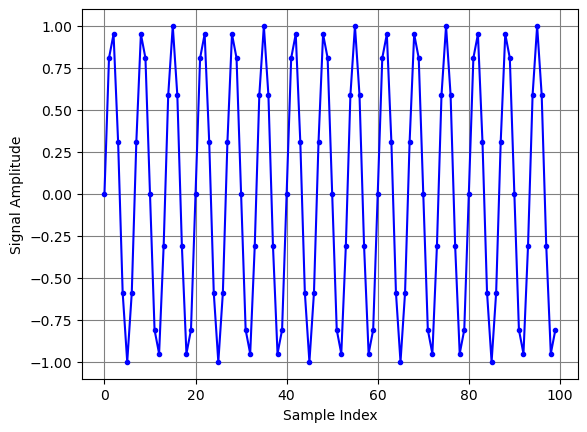

In [1]:
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(100)
s = np.sin(0.15*2*np.pi*t)
plt.plot(s,'b.-')
plt.xlabel('Sample Index')
plt.ylabel('Signal Amplitude')
plt.grid(color='grey')

<!--- <img src='./images/fft-python1.svg'> --->

Next let’s use NumPy’s FFT function:

In [2]:
S = np.fft.fft(s)

If we look at S we see it’s an array of complex numbers:

In [3]:
print(S[0:4])

[ 5.66723963e-15+0.00000000e+00j -2.17003711e-15-1.55431223e-15j
  1.45036422e-14+2.20343644e-15j -1.83792933e-14+3.88578059e-15j]


Hint: regardless of what you’re doing, if you ever run into complex numbers, try calculating the magnitude and the phase and see if they make more sense. Let’s do exactly that, and plot the magnitude and phase. In most languages, abs() is a function for magnitude of a complex number. The function for phase varies by language, but in Python we can use NumPy’s np.angle(), which returns the phase in units of radians.

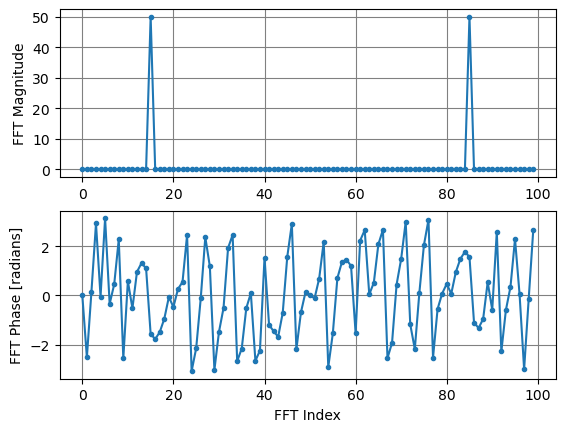

In [4]:
import matplotlib.pyplot as plt
S_mag = np.abs(S)
S_phase = np.angle(S)

fig, ax = plt.subplots(nrows=2,ncols=1)
ax[0].plot(t,S_mag,'.-')
ax[0].set_ylabel('FFT Magnitude')
ax[0].grid(color='grey')
ax[1].plot(t,S_phase,'.-')
ax[1].set_xlabel('FFT Index')
ax[1].set_ylabel('FFT Phase [radians]')
ax[1].grid(color='grey')

<!--- <img src='./images/fft-python2.svg'> -->

Right now we aren’t providing any x-axis to the plots, it’s just the index of the array (counting up from 0). Due to mathematical reasons, the output of the FFT has the following format:

<img src = './images/fft-python3.svg'>

But we want 0 Hz (DC) in the center and negative frequencies to the left (that’s just how we like to visualize things). So any time we do an FFT we need to perform an “FFT shift”, which is just a simple array rearrangement operation, kind of like a circular shift but more of a “put this here and that there”. The diagram below fully defines what the FFT shift operation does:

<img src = './images/fft-python4.svg'>

For our convenience, NumPy has an FFT shift function, `np.fft.fftshift()`. Replace the `np.fft.fft()` line with:

In [5]:
S = np.fft.fftshift(np.fft.fft(s))

We also need to figure out the x-axis values/label. Recall that we used a sample rate of 1 Hz to keep things simple. That means the left edge of the frequency domain plot will be -0.5 Hz and the right edge will be 0.5 Hz. If that doesn’t make sense, it will after you get through the chapter on IQ Sampling. Let’s stick to that assumption that our sample rate was 1 Hz, and plot the FFT output’s magnitude and phase with a proper x-axis label. Here is the final version of this Python example and the output:

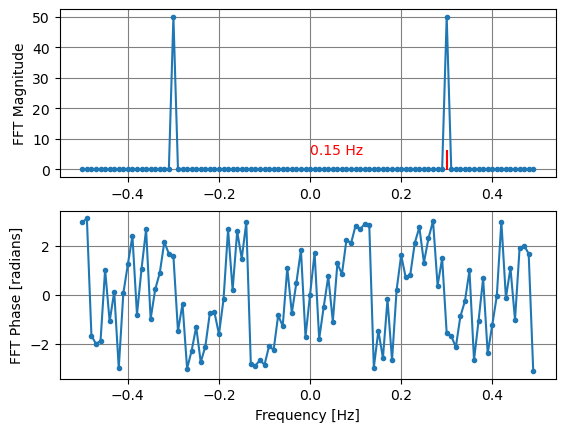

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 1 # Hz
N = 100 # number of points to simulate, and our FFT size

t = np.arange(N) # because our sample rate is 1 Hz
omega = 0.3 # input frequency in Hz
s = np.sin(omega*2*np.pi*t)
S = np.fft.fftshift(np.fft.fft(s))
S_mag = np.abs(S)
S_phase = np.angle(S)
f = np.arange(Fs/-2, Fs/2, Fs/N)

fig, ax = plt.subplots(nrows=2,ncols=1)
ax[0].plot(f,S_mag,'.-')
ax[0].set_ylabel('FFT Magnitude')
ax[0].grid(color='grey')
ax[0].text(0,5,'0.15 Hz',color='red')
ax[0].plot([omega,omega],[-0.05,6.0],color='red')
ax[1].plot(f,S_phase,'.-')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('FFT Phase [radians]')
ax[1].grid(color='grey')



<!-- <img src='./images/fft-python5.svg'> -->

Note that we see our spike at 0.15 Hz, which is the frequency we used when creating the sine wave. So that means our FFT worked! If we did not know the code used to generate that sine wave, but we were just given the list of samples, we could use the FFT to determine the frequency. The reason why we see a spike also at -0.15 Hz has to do with the fact it was a real signal, not complex, and we will get deeper into that later.

## Windowing

When we use an FFT to measure the frequency components of our signal, the FFT assumes that it’s being given a piece of a periodic signal. It behaves as if the piece of signal we provided continues to repeat indefinitely. It’s as if the last sample of the slice connects back to the first sample. It stems from the theory behind the Fourier Transform. It means that we want to avoid sudden transitions between the first and last sample because sudden transitions in the time domain look like many frequencies, and in reality our last sample doesn’t actually connect back to our first sample. To put it simply: if we are doing an FFT of 100 samples, using np.fft.fft(x), we want x[0] and x[99] to be equal or close in value.

The way we make up for this cyclic property is through “windowing”. Right before the FFT, we multiply the slice of signal by a window function, which is just any function that tapers to zero on both ends. That ensures the slice of signal will begin and end at zero and connect. Common window functions include Hamming, Hanning, Blackman, and Kaiser. When you don’t apply any windowing, it’s called using a “rectangular” window because it’s like multiplying by an array of ones. Here is what several window functions look like:

<img src='./images/windows.svg'>

A simple approach for beginners is to just stick with a Hamming window, which can be created in Python with `np.hamming(N)` where N is the number of elements in the array, which is your FFT size. In the above exercise, we would apply the window right before the FFT. After the 2nd line of code we would insert:


In [7]:
s = s * np.hamming(100)

If you are afraid of choosing the wrong window, don’t be. The difference between Hamming, Hanning, Blackman, and Kaiser is very minimal compared to not using a window at all since they all taper to zero on both sides and solve the underlying problem.

## FFT Sizing

The last thing to note is FFT sizing. The best FFT size is always an order of 2 because of the way the FFT is implemented. You can use a size that is not an order of 2, but it will be slower. Common sizes are between 128 and 4,096, although you can certainly go larger. In practice we may have to process signals that are millions or billions of samples long, so we need to break up the signal and do many FFTs. That means we will get many outputs. We can either average them up or plot them over time (especially when our signal is changing over time). You don’t have to put every sample of a signal through an FFT to get a good frequency domain representation of that signal. For example you could only FFT 1,024 out of every 100k samples in a signal and it will still probably look fine, as long as the signal is always on.

## Spectrogram/Waterfall

A spectrogram is the plot that shows frequency over time. It is simply a bunch of FFTs stacked together (vertically, if you want frequency on the horizontal axis). We can also show it in real-time, often referred to as a waterfall. A spectrum analyzer is the piece of equipment that shows this spectrogram/waterfall. The diagram below shows how an array of IQ samples can be sliced up to form a spectrogram:

<img src='./images/spectrogram_diagram.svg'>

Because a spectrogram involves plotting 2D data, it’s effectively a 3D plot, so we have to use a colormap to represent the FFT magnitudes, which are the “values” we want to plot. Here is an example of a spectrogram, with frequency on the horizontal/x-axis and time on the vertical/y-axis. Blue represents the lowest energy and red is the highest. We can see that there is a strong spike at DC (0 Hz) in the center with a varying signal around it. Blue represents our noise floor.

<img src = './images/waterfall.png'>

Remember, it’s just rows of FFTs stacked on top of each other, each row is 1 FFT (technically, the magnitude of 1 FFT). Be sure to time-slice your input signal in slices of your FFT size (e.g., 1024 samples per slice). Before jumping into the code to produce a spectrogram, here is an example signal we will use, it is simply a tone in white noise:

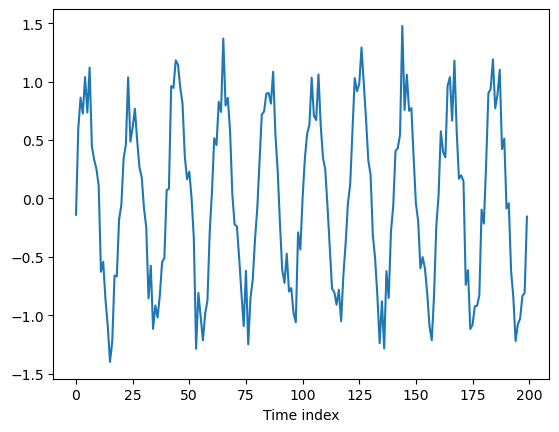

In [8]:
import numpy as np
import matplotlib.pyplot as plt

sample_rate = 1e6
# Generate tone plus noise
t = np.arange(1024*1000)/sample_rate # time vector
f = 50e3 # freq of tone
x = np.sin(2*np.pi*f*t) + 0.2*np.random.randn(len(t))

plt.plot(x[0:200])
plt.xlabel('Time index');

<!--- Here is what it looks like in the time domain (first 200 samples):

<img src = './images/spectrogram_time.svg'> --->

In Python we can generate a spectrogram as follows:

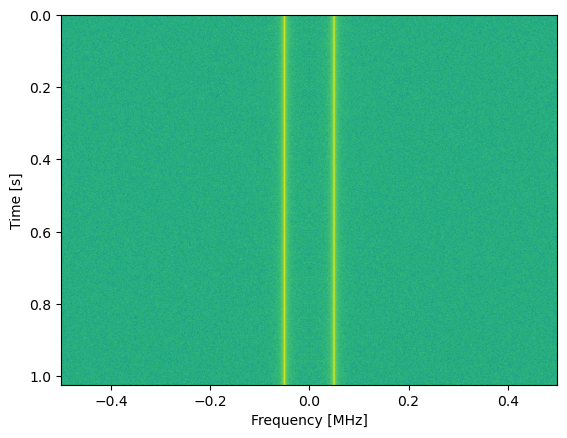

In [9]:
# simulate the signal above, or use your own signal

fft_size = 1024
num_rows = len(x) // fft_size # // is an integer division which rounds down
spectrogram = np.zeros((num_rows, fft_size))
for i in range(num_rows):
    spectrogram[i,:] = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i*fft_size:(i+1)*fft_size])))**2)

plt.imshow(spectrogram, aspect='auto', extent = [sample_rate/-2/1e6, sample_rate/2/1e6, len(x)/sample_rate, 0])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Time [s]");

It is not the most interesting spectrogram because there is no time-varying behavior. There are two tones because we simulated a real signal, and real signals always have a negative PSD that matches the positive side. For more interesting examples of spectrograms, checkout https://www.IQEngine.org!

<!--- <img src = './images/spectrogram.svg'> --->

## FFT Implementation

Even though NumPy has already implemented the FFT for us, it’s nice to know the basics of how it works under the hood. The most popular FFT algorithm is the Cooley-Tukey FFT algorithm, first invented around 1805 by Carl Friedrich Gauss and then later rediscovered and popularized by James Cooley and John Tukey in 1965.

The basic version of this algorithm works on power-of-two size FFTs, and is intended for complex inputs but can also work on real inputs. The building block of this algorithm is known as the butterfly, which is essentially a N = 2 size FFT, consisting of two multiplies and two summations:

<img src='./images/butterfly.svg'>

or

\begin{eqnarray}
   y_0 = x_0 + x_1 w^k_N \\
   y_1 = x_0 - x_1 w^k_N
\end{eqnarray}

where $w^k_N = e^{i2\pi k/N}$ are known as twiddle factors ($N$ is the size of the sub-FFT and $k$ is the index). Note that the input and output is intended to be complex, _e.g._, $x_0$ might be 0.6123 - 0.5213i, and the sums/multiplies are complex.

The algorithm is recursive and breaks itself in half until all that is left is a series of butterflies, this is depicted below using a size 8 FFT:

<img src='./images/butterfly2.svg'>

Each column in this pattern is a set of operations that can be done in parallel, and $log_2(N)$ steps are performed, which is why the computational complexity of the FFT is $O(N\log N)$ while a DFT is $O(N^2)$.

For those who prefer to think in code rather than equations, the following shows a simple Python implementation of the FFT, along with an example signal consisting of a tone plus noise, to try the FFT out with.


/Users/jimp/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


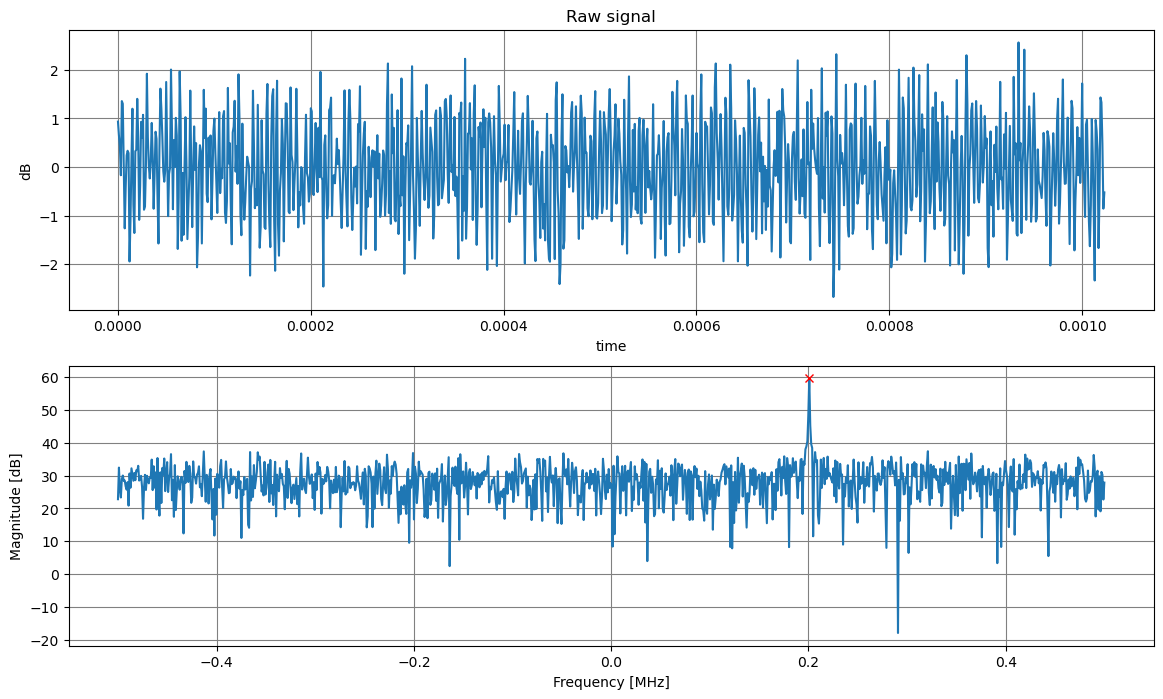

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def fft(x):
    N = len(x)
    if N == 1:
        return x
    twiddle_factors = np.exp(-2j * np.pi * np.arange(N//2) / N)
    x_even = fft(x[::2]) # yay recursion!
    x_odd = fft(x[1::2])
    return np.concatenate([x_even + twiddle_factors * x_odd,
                           x_even - twiddle_factors * x_odd])

# Simulate a tone + noise
sample_rate = 1e6
f_offset = 0.2e6 # 200 kHz offset from carrier
N = 1024
t = np.arange(N)/sample_rate
s = np.exp(2j*np.pi*f_offset*t)
n = (np.random.randn(N) + 1j*np.random.randn(N))/np.sqrt(2) # unity complex noise
r = s + n # 0 dB SNR

# Perform fft, fftshift, convert to dB
X = fft(r)
X_shifted = np.roll(X, N//2) # equivalent to np.fft.fftshift
X_mag = 10*np.log10(np.abs(X_shifted)**2)

# Plot results
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(14,8))
ax[0].plot(t,r)
ax[0].set_xlabel('time')
ax[0].set_ylabel('dB')
ax[0].set_title('Raw signal')
ax[0].grid(color='grey')

f = np.linspace(sample_rate/-2, sample_rate/2, N)/1e6 # plt in MHz
ax[1].plot(f, X_mag)
ax[1].plot(f[np.argmax(X_mag)], np.max(X_mag), 'rx') # show max
ax[1].set_xlabel('Frequency [MHz]')
ax[1].set_ylabel('Magnitude [dB]')
ax[1].grid(color='grey')

## Applied spectral analysis: working with sound

Perhaps the most intuitive application of spectra, or working in the frequency domain, is sound.  The human ear hears frequencies, and in fact musical representation of notes on a scale is a form of spectrum.  To begin, it should be recognized that sound travels (propagates as a wave, so let's first get comfortable working in python to generate and plot generic waves.

To do this we will make use of the python modules for numerics and arrays (numpy) and for plotting (matplotlib)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

To start, let's try and create a wave, more specifically a sine curve, with a set frequency and amplitude.  In this example we will use a standard musical note (A4) which is 440 Hz (cycles per second).  Check out http://www.szynalski.com/tone-generator to get different ones.  

First we'll define the time period to run for "P" seconds, and our resolution will be "time_res" seconds.  We will then make a sine curve.

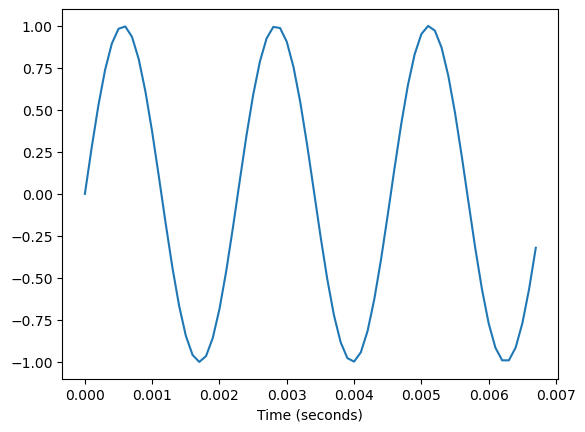

In [12]:
# define our desired wave frequency in Hz, or cycles/second
C4 = 261.626 # (middle C)
A4 = 440
C6 = 1046.502
input_frequency = A4

# set the total length of the time-series (wave) in seconds; when converted to a sound file this will be the 
# the length of time the sound plays; here we set it to five seconds.
P = 5.0

# now set the time resolution, here 0.1 milisecond
time_res = 0.0001

# next we create the time axis; this can be done via np.arange (specify the start, stop and increment), or
# via np.linspace (specify the start, stop and number of points)

# method 1: use linspace, specify total number of points (points per second * number seconds) or (RATE*P)
RATE = 1/time_res
time = np.linspace(0,P,int(RATE*P))

# method 2: use arange, specify the delta-time, compute the number of points per second (RATE)
#time = np.arange(0, P, time_res)
#RATE = len(time)/P

# convert the desired frequency from cycles/second to radians/second
frequency = 2.0 * np.pi * input_frequency

# make wave
wave = np.sin(frequency*time)

# now plot; note here that with 440 cycles per second a plot of the entire time range of 3 seconds will have 3*440
#   cycles (too many to see).  Instead let's focus on the first 68 points (0 to 0.0068 seconds).  This should give
#   about three cycles (3/440=0.0068)
#   
plt.plot(time[0:68],wave[0:68])
plt.xlabel('Time (seconds)');

To play this as an audio file we use the python function "Audio" found in the module "IPython.display"

In [13]:
import IPython.display as ipd

# here the syntax is ipd.Audio(wave variable name, rate=sampling rate);
# the sampling rate is given either
# we should hear a tone at frequency given by "input_frequency" and duration given by "P"
ipd.Audio(wave,rate=RATE)

We now want to make a spectrum.  This essentially converts the signal from a waveform (function of time) to power (function of frequency)

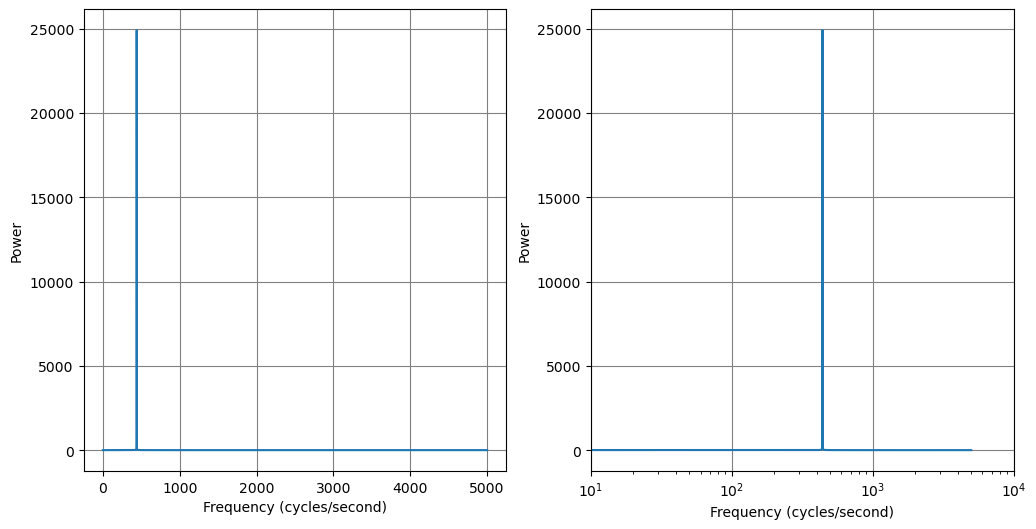

In [14]:
spec = np.abs(np.fft.rfft(wave))
f = np.linspace(0, RATE/2, len(spec))

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ax[0].plot(f,spec)
ax[0].set_xlabel('Frequency (cycles/second)')
ax[0].set_ylabel('Power')
ax[0].grid(color='grey')

plt.xlim(10,10000)
ax[1].semilogx(f,spec)
ax[1].set_xlim(10,10000)
ax[1].set_xlabel('Frequency (cycles/second)')
ax[1].set_ylabel('Power')
ax[1].grid(color='grey')

Since, typically, sound is a continuous wave while spectra are run over discrete subsets, a different way of looking at frequency peaks is via a spectrogram, essentially a spectrum over discrete subsets that is continuously update.  Here we have to define the "subsets" or number of spectra that are run.

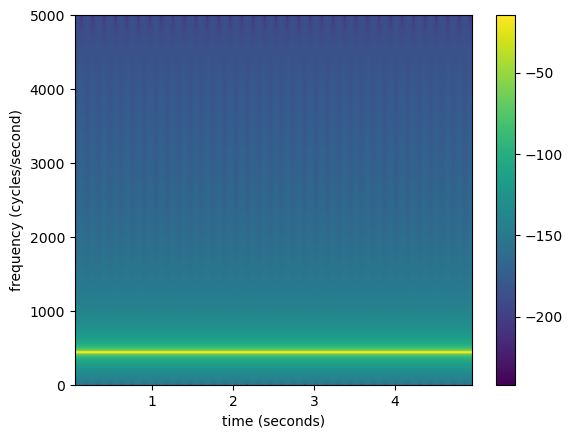

In [15]:
NFFT = 1024
Pxx, freqs, bins, im = plt.specgram(wave, NFFT=NFFT, Fs=1.0/time_res, noverlap=900)
plt.ylabel('frequency (cycles/second)')
plt.xlabel('time (seconds)')
plt.colorbar();

Let's now try to expand this.  Since each note has a specific frequency, let's try concatonate a bunch of sounds together.

In [16]:
# first let's define some notes on the main scale
E = 2.0 * np.pi * 330.0
D = 2.0 * np.pi * 294.0
C = 2.0 * np.pi * 262.0

# now set the "song" to be a series of seven notes, one after the other, E-D-C-D-E-E-E
# and we'll "play" each note for one second; our total waveform will now be seven seconds long
P = 7
RATE = int(RATE)
time = np.linspace(0,P,RATE*P)
wave = np.sin(E*time[1:RATE])
wave = np.append(wave,np.sin(D*time[RATE:2*RATE]))
wave = np.append(wave,np.sin(C*time[2*RATE:3*RATE]))
wave = np.append(wave,np.sin(D*time[3*RATE:4*RATE]))
wave = np.append(wave,np.sin(E*time[4*RATE:5*RATE]))
wave = np.append(wave,np.sin(E*time[5*RATE:6*RATE]))
wave = np.append(wave,np.sin(E*time[6*RATE:7*RATE]))
ipd.Audio(wave,rate=RATE)

What does the spectrum of this show?

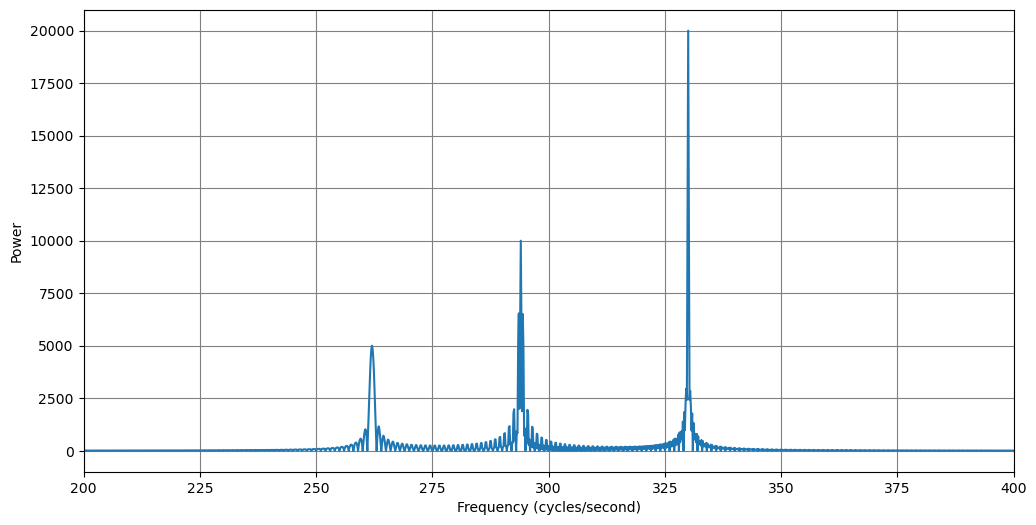

In [17]:
spec = np.abs(np.fft.rfft(wave))
f = np.linspace(0, RATE/2, len(spec))

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,6))
ax.plot(f,spec)
ax.set_xlim(200,400)
ax.set_xlabel('Frequency (cycles/second)')
ax.set_ylabel('Power')
ax.grid(color='grey')

Now the spectrogram might be more interesting, since the notes (frequency) changes over time

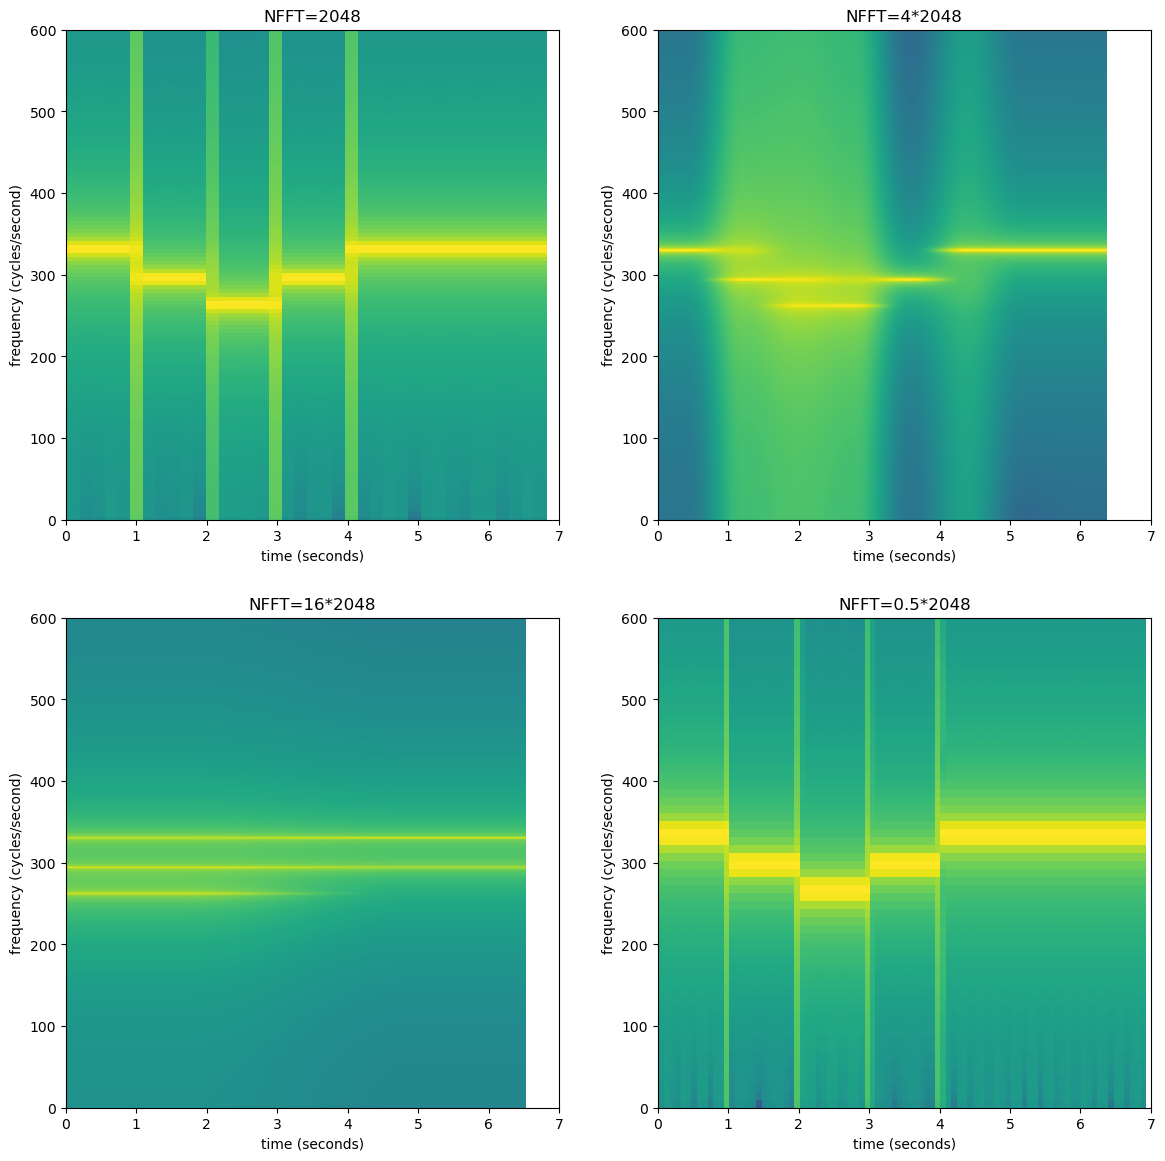

In [18]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(14,14))
Pxx, freqs, bins, im = ax[0,0].specgram(wave, NFFT=2048, Fs=RATE, noverlap=256)
ax[0,0].set_ylim(0,600)
ax[0,0].set_xlim(0,P)
ax[0,0].set_ylabel('frequency (cycles/second)')
ax[0,0].set_xlabel('time (seconds)')
ax[0,0].set_title('NFFT=2048')

Pxx, freqs, bins, im = ax[0,1].specgram(wave, NFFT=4*2048, Fs=RATE, noverlap=256)
ax[0,1].set_ylim(0,600)
ax[0,1].set_xlim(0,P)
ax[0,1].set_ylabel('frequency (cycles/second)')
ax[0,1].set_xlabel('time (seconds)')
ax[0,1].set_title('NFFT=4*2048')

Pxx, freqs, bins, im = ax[1,0].specgram(wave, NFFT=16*2048, Fs=RATE, noverlap=256)
ax[1,0].set_ylim(0,600)
ax[1,0].set_xlim(0,P)
ax[1,0].set_ylabel('frequency (cycles/second)')
ax[1,0].set_xlabel('time (seconds)')
ax[1,0].set_title('NFFT=16*2048')

Pxx, freqs, bins, im = ax[1,1].specgram(wave, NFFT=1024, Fs=RATE, noverlap=256)
ax[1,1].set_ylim(0,600)
ax[1,1].set_xlim(0,P)
ax[1,1].set_ylabel('frequency (cycles/second)')
ax[1,1].set_xlabel('time (seconds)')
ax[1,1].set_title('NFFT=0.5*2048');

#plt.colorbar()

## Specific example: shama song

This is an example acoustic analysis done on the song from _Copsychus malabaricus_ or the __white-rumped shama__.  The shama is a small passerine bird of the family Muscicapidae and comes from India and southeast Asia, but it is now commonly seen in Hawaii.  This sample comes from our backyard in Aina Haina. 

<center>
<img src='./images/shama.jpg'>
</center>

First, as always, we import the needed packages; in this case pyaudio to grab sound from the microphone (either internal or external), struct to convert the digital sound from packed binary to integer, numpy for array handling, scipy for fft (making spectrum) and matplotlib to plot

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from skimage import util

In [20]:
# read data from wav file
rate, audio = wavfile.read('./data/shama.wav')

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_62087/4144834843.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio = wavfile.read('./data/shama.wav')


In [21]:
from IPython.display import Audio
Audio('./data/shama.wav',rate=rate)

Display the length of the audio array and sample rate:

In [22]:
print(f"number of channels = {audio.shape[1]}")
length = audio.shape[0] / rate
print(f"length = {length}s")

number of channels = 2
length = 6.435759637188209s


Visualizing Audio

In order to display plots inside the Jupyter notebook, run the following commands, preferably at the top of your notebook:

In [23]:
# convert to mono by averaging the left and right channels.
audio = np.mean(audio, axis=1)

# get shape and length of record
N = audio.shape[0]
L = N / rate

print(f'Audio length: {L:.2f} seconds')

Audio length: 6.44 seconds


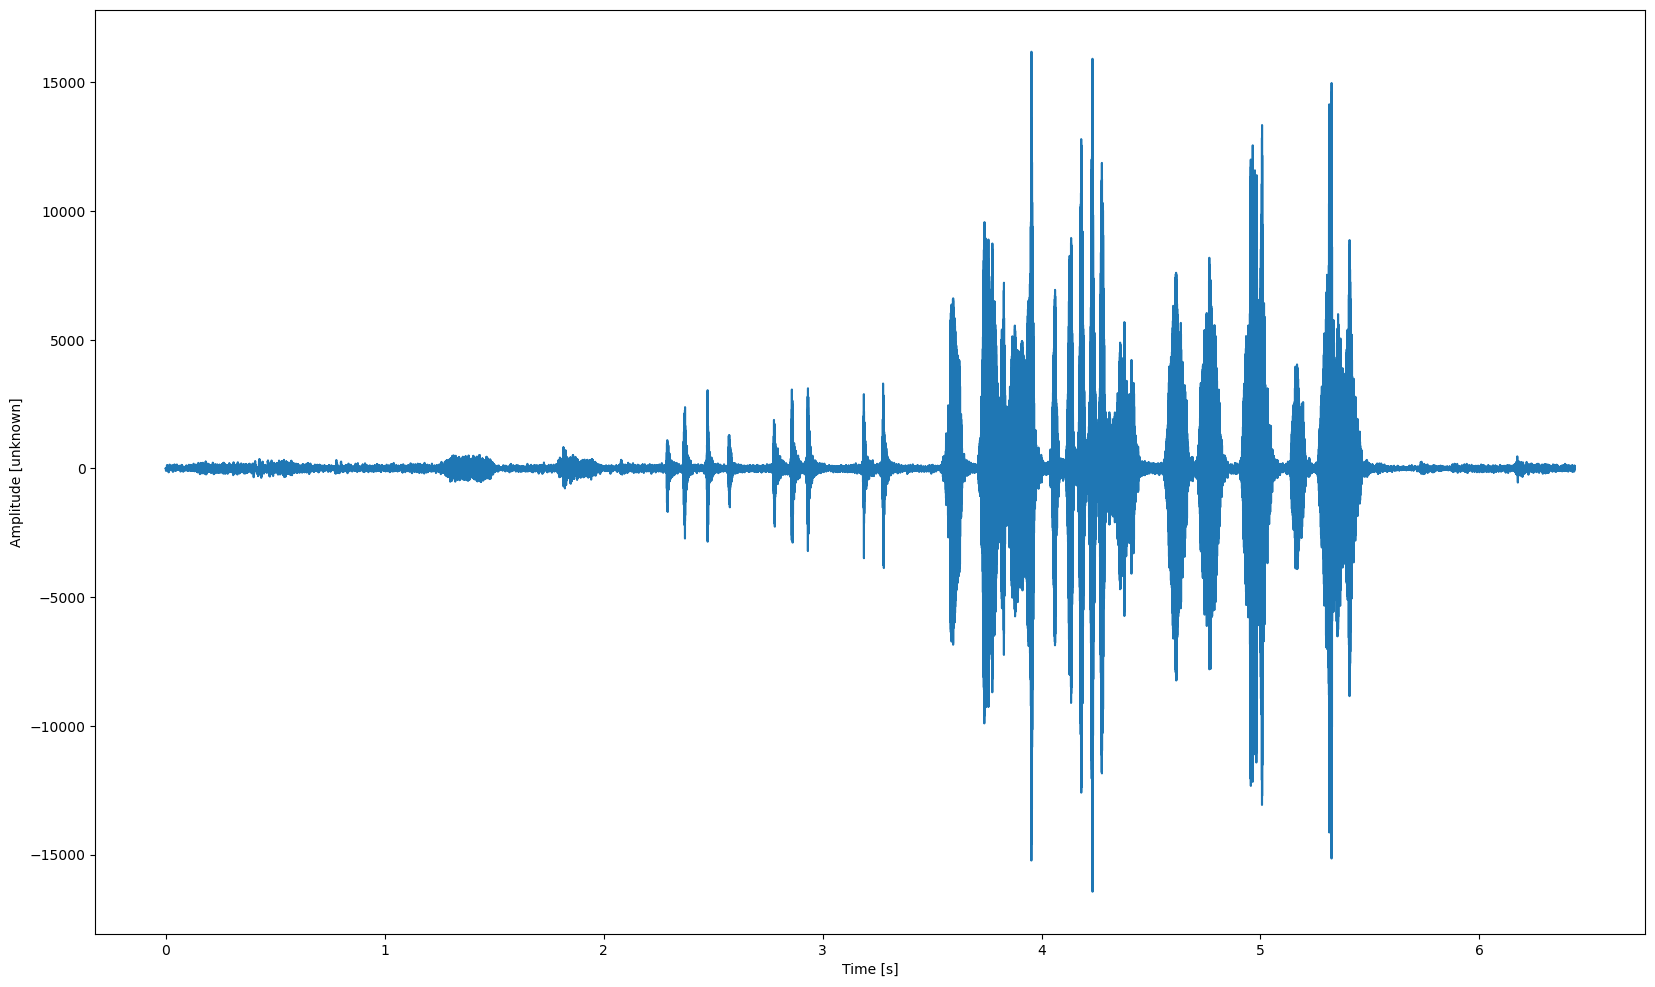

In [24]:
# make a plot
f, ax = plt.subplots(figsize=(20,12))
ax.plot(np.arange(N) / rate, audio)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [unknown]')
plt.show()

Start by chopping up the signal into slices of 1024 samples, each slice overlapping the previous by 100 samples. The resulting slices object contains one slice per row.

In [25]:
M = 1024

slices = util.view_as_windows(audio, window_shape=(M,), step=100)
print(f'Audio shape: {audio.shape}, Sliced audio shape: {slices.shape}')

Audio shape: (283817,), Sliced audio shape: (2828, 1024)


Generate a windowing function (see “Windowing” for a discussion of the underlying assumptions and interpretations of each) and multiply it with the signal:

In [26]:
win = np.hanning(M + 1)[:-1]
slices = slices * win
# It’s more convenient to have one slice per column, so we take the transpose:
slices = slices.T
print('Shape of `slices`:', slices.shape)

Shape of `slices`: (1024, 2828)


For each slice, calculate the DFT, which returns both positive and negative frequencies (more on that in “Frequencies and Their Ordering”), so we slice out the positive M2 frequencies for now.
(As a quick aside, you’ll note that we use scipy.fftpack.fft and np.fft interchangeably. NumPy provides basic FFT functionality, which SciPy extends further, but both include an fft function, based on the Fortran FFTPACK.)


In [27]:
spectrum = np.fft.fft(slices, axis=0)[:M // 2 + 1:-1]
spectrum = np.abs(spectrum)

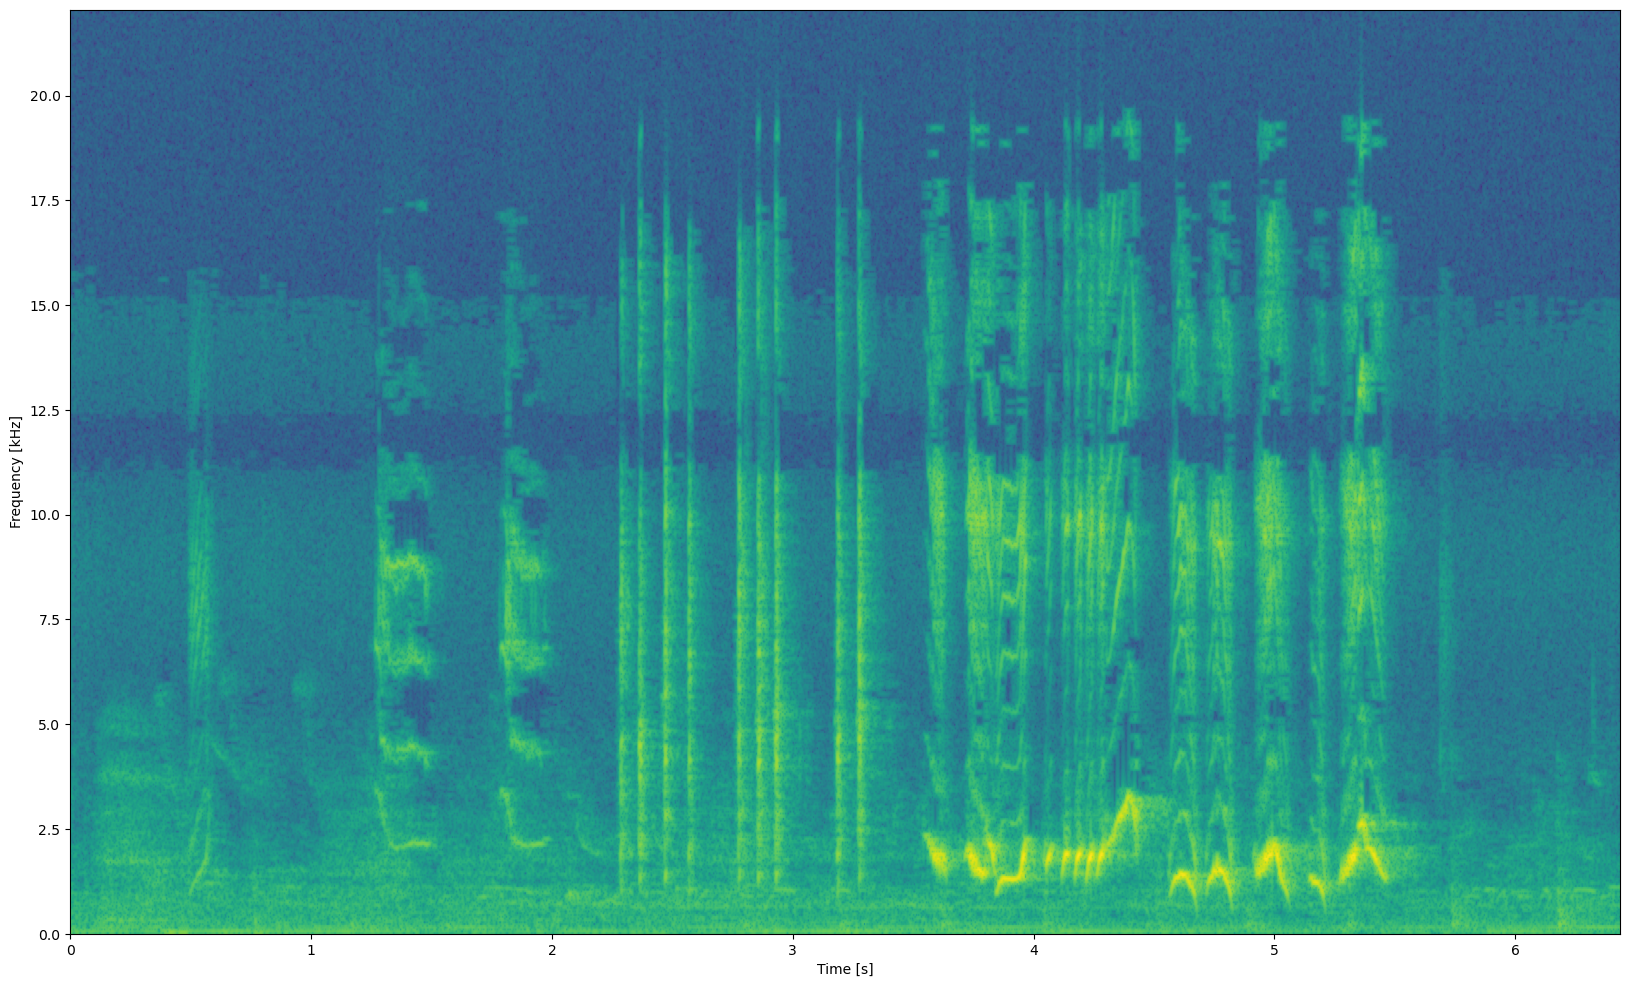

In [28]:
# make a plot
f, ax = plt.subplots(figsize=(20,12))

S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))

ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, L, 0, rate / 2 / 1000))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]')
plt.show()